In [1]:
#Step 1: Importing necessary libraries and loading the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the insurance dataset
df = pd.read_csv('insurance.csv')

# Preview the first 5 rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
#Step 2: Exploratory Data Analysis (EDA)

# Check the data types of each column
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [3]:
# Check the summary statistics of the numerical variables
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

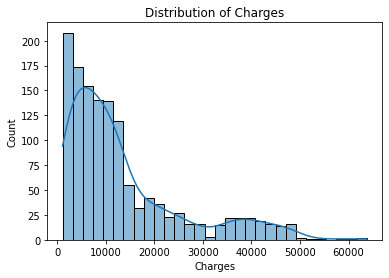

In [5]:
# Visualize the distribution of the target variable 'charges'
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.show()

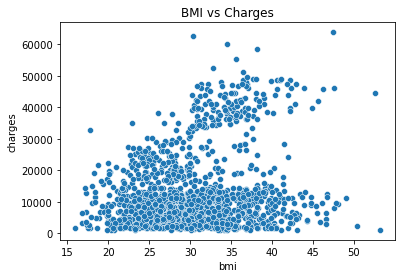

In [6]:
# Visualize the relationship between 'bmi' and 'charges'
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')
plt.show()


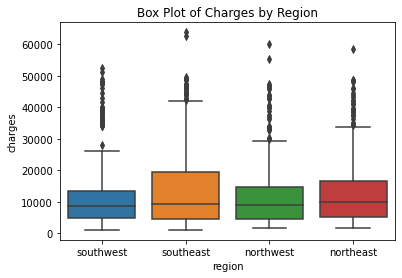

In [7]:
# Visualize the relationship between 'region' and 'charges'
sns.boxplot(x='region', y='charges', data=df)
plt.title('Box Plot of Charges by Region')
plt.show()

In [8]:
#step 3: Training the Models

# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('charges', axis=1), df['charges'], test_size=0.2, random_state=0)

In [11]:
# Build Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [12]:
# Predict on test set and calculate Mean Squared Error
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Random Forest Mean Squared Error:', mse)

Random Forest Mean Squared Error: 19632534.781059742


In [13]:
#step 4: Combining the Models

# Split the data into training and testing sets
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Create a Random Forest regression model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Make predictions
y_pred = rf_reg.predict(X_test)

In [16]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Random Forest Mean Squared Error:", mse)

Random Forest Mean Squared Error: 20942520.922619622


In [17]:
#step 5:Evaluating the Ensemble

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
# Define the models
rf1 = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
rf2 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
lr = LinearRegression()

In [19]:
# Define the ensemble models
voting_regressor = VotingRegressor([('rf1', rf1), ('rf2', rf2), ('lr', lr)])
stacking_regressor = StackingRegressor([('rf1', rf1), ('rf2', rf2)], final_estimator=lr)

In [20]:
# Fit the models
rf1.fit(X_train, y_train)
rf2.fit(X_train, y_train)
lr.fit(X_train, y_train)
voting_regressor.fit(X_train, y_train)
stacking_regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('rf1',
                               RandomForestRegressor(max_depth=5,
                                                     n_estimators=50,
                                                     random_state=42)),
                              ('rf2',
                               RandomForestRegressor(max_depth=5,
                                                     random_state=42))],
                  final_estimator=LinearRegression())

In [21]:
# Predict the test data using the models
y_pred_rf1 = rf1.predict(X_test)
y_pred_rf2 = rf2.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_voting = voting_regressor.predict(X_test)
y_pred_stacking = stacking_regressor.predict(X_test)

In [22]:
# Calculate the Mean Squared Error (MSE)
mse_rf1 = mean_squared_error(y_test, y_pred_rf1)
mse_rf2 = mean_squared_error(y_test, y_pred_rf2)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_voting = mean_squared_error(y_test, y_pred_voting)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)

In [23]:
# Print the MSE for each model
print("Random Forest 1 Mean Squared Error: {:.2f}".format(mse_rf1))
print("Random Forest 2 Mean Squared Error: {:.2f}".format(mse_rf2))
print("Linear Regression Mean Squared Error: {:.2f}".format(mse_lr))
print("Voting Regressor Mean Squared Error: {:.2f}".format(mse_voting))
print("Stacking Regressor Mean Squared Error: {:.2f}".format(mse_stacking))

Random Forest 1 Mean Squared Error: 19597792.53
Random Forest 2 Mean Squared Error: 19624450.05
Linear Regression Mean Squared Error: 33596915.85
Voting Regressor Mean Squared Error: 20047686.89
Stacking Regressor Mean Squared Error: 19565839.79


In [24]:
#step 6: Tuning the Ensemble

# Importing the required libraries for evaluation
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# Initialize the random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [26]:
# Fit the random forest model on the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Predicting the target variable for the test data
y_pred_test = model.predict(X_test)

In [28]:
# Computing the mean squared error (MSE) on test data
mse = mean_squared_error(y_test, y_pred_test)
print("Random Forest Mean Squared Error:", mse)

Random Forest Mean Squared Error: 20942520.922619622


In [29]:
# Computing the R-squared (R2) score on test data
r2 = r2_score(y_test, y_pred_test)
print("Random Forest R-squared Score:", r2)

Random Forest R-squared Score: 0.8651034329144947
